# Introduction to Regression with Neural Networks in Tensorflow

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import tensorflow as tf
print(tf.__version__)

2022-03-08 14:43:37.448842: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-03-08 14:43:37.448882: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


2.8.0


# Creating data to view and fit

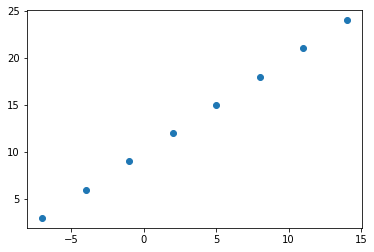

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

plt.scatter(X,y)

In [5]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

# Input and Output Shapes

In [6]:
# Create a demo tensor for our housing price predictions 

house_info = tf.constant(['bedroom','bathroom','garage'])
house_price = tf.constant([939700])
house_info, house_price

2022-03-08 14:43:42.404872: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-03-08 14:43:42.404908: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-03-08 14:43:42.404935: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (default): /proc/driver/nvidia/version does not exist
2022-03-08 14:43:42.408720: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [7]:
input_shape = X[0].shape
output_shape = y[0].shape

input_shape,output_shape

((), ())

In [8]:
# Turn numpy arrays to tensors

X = tf.constant(X)
y = tf.constant(y)

X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [9]:
input_shape = X[0].shape
output_shape = y[0].shape

input_shape, output_shape

(TensorShape([]), TensorShape([]))

In [10]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae, optimizer = tf.keras.optimizers.Adam(lr = 0.01), metrics=['mae'])

# 3. Fit the model
#model.fit(X,y, epochs = 5)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100) 

Epoch 1/100
1/1 [==============================] - 1s 635ms/step - loss: 12.3185 - mae: 12.3185
Epoch 2/100
1/1 [==============================] - 0s 5ms/step - loss: 11.4382 - mae: 11.4382
Epoch 3/100
1/1 [==============================] - 0s 4ms/step - loss: 10.5494 - mae: 10.5494
Epoch 4/100
1/1 [==============================] - 0s 3ms/step - loss: 9.7152 - mae: 9.7152
Epoch 5/100
1/1 [==============================] - 0s 3ms/step - loss: 9.0090 - mae: 9.0090
Epoch 6/100
1/1 [==============================] - 0s 3ms/step - loss: 8.2746 - mae: 8.2746
Epoch 7/100
1/1 [==============================] - 0s 9ms/step - loss: 7.5151 - mae: 7.5151
Epoch 8/100
1/1 [==============================] - 0s 4ms/step - loss: 6.7230 - mae: 6.7230
Epoch 9/100
1/1 [==============================] - 0s 5ms/step - loss: 5.8980 - mae: 5.8980
Epoch 10/100
1/1 [==============================] - 0s 5ms/step - loss: 5.0336 - mae: 5.0336
Epoch 11/100
1/1 [==============================] - 0s 5ms/step - loss:

In [11]:
y_pred = model.predict([17])
y_pred

array([[26.206875]], dtype=float32)

# Evalueate the Model

In [12]:
X = tf.range(-100,100,4)
y = X + 10
X, y

(<tf.Tensor: shape=(50,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
          76,   80,   84,   88,   92,   96], dtype=int32)>,
 <tf.Tensor: shape=(50,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>)

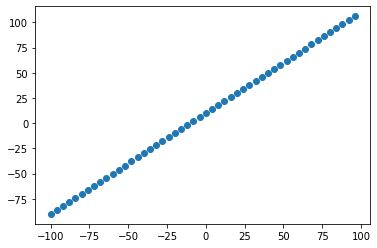

In [13]:
plt.scatter(X,y)

In [14]:
# Check the lenghth of how many samples
len(X)

50

In [15]:
# Split the data into train and test sets
X_train = X[:40]
y_train = y[:40]

X_test = X[40:]
y_test = y[40:]

len(X_train), len(X_test)

(40, 10)

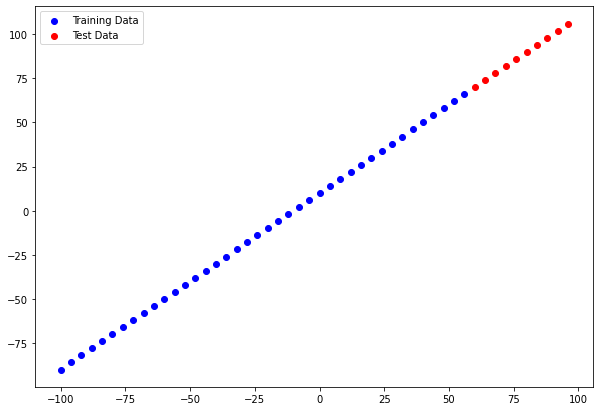

In [16]:
## Visulise the data in training and test sets

plt.figure(figsize = (10,7))
plt.scatter(X_train,y_train, c = 'b', label = "Training Data")
plt.scatter(X_test, y_test, c = 'r',label = 'Test Data')
plt.legend()
plt.show()

In [28]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape = [1])
])

model_1.compile(loss = tf.keras.losses.mae, optimizer = tf.keras.optimizers.SGD(), metrics=['mae'])
model_2.fit(tf.expand_dims(X_train,-1), y_train, epochs = 100)

Epoch 1/100
2/2 [==============================] - 0s 4ms/step - loss: 7.4494 - mae: 7.4494
Epoch 2/100
2/2 [==============================] - 0s 3ms/step - loss: 9.2391 - mae: 9.2391
Epoch 3/100
2/2 [==============================] - 0s 2ms/step - loss: 9.6116 - mae: 9.6116
Epoch 4/100
2/2 [==============================] - 0s 2ms/step - loss: 8.7602 - mae: 8.7602
Epoch 5/100
2/2 [==============================] - 0s 4ms/step - loss: 9.7251 - mae: 9.7251
Epoch 6/100
2/2 [==============================] - 0s 6ms/step - loss: 8.9002 - mae: 8.9002
Epoch 7/100
2/2 [==============================] - 0s 4ms/step - loss: 8.0002 - mae: 8.0002
Epoch 8/100
2/2 [==============================] - 0s 3ms/step - loss: 8.1138 - mae: 8.1138
Epoch 9/100
2/2 [==============================] - 0s 2ms/step - loss: 19.0986 - mae: 19.0986
Epoch 10/100
2/2 [==============================] - 0s 2ms/step - loss: 9.3698 - mae: 9.3698
Epoch 11/100
2/2 [==============================] - 0s 3ms/step - loss: 7.549

In [29]:
model_1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


# Visualizing the Predictions

In [35]:
y_preds_1 = model_1.predict(X_test)

In [36]:
y_preds_1

array([[34.203594],
       [36.483833],
       [38.764072],
       [41.04431 ],
       [43.32455 ],
       [45.60479 ],
       [47.885033],
       [50.16527 ],
       [52.44551 ],
       [54.72575 ]], dtype=float32)

In [32]:
def plot_predictions(train_data = X_train,
                    train_labels = y_train,
                    test_data = X_test,
                    test_labels = y_test,
                    predictions = y_preds):

# Plot training data, test data  and compare prediction.


    plt.figure(figsize = (10,7))
    plt.scatter(train_data, train_labels, c = 'b', label = "Training Data")
    plt.scatter(test_data, test_labels, c = "g", label = "Testing Data")
    plt.scatter(test_data, predictions, c = 'r', label = "Predictions")
    plt.legend()

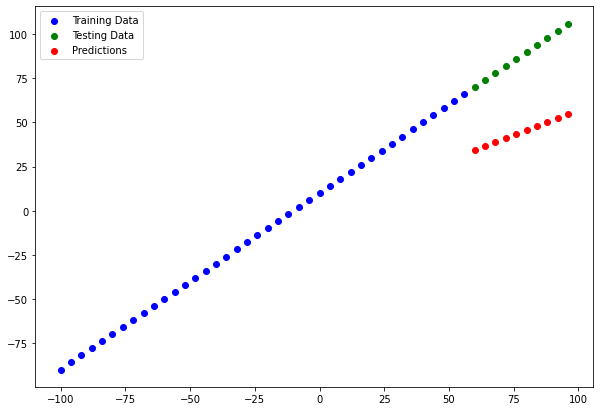

In [33]:
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_preds)

In [34]:
model_1.evaluate(X_test, y_test)

1/1 [==============================] - 0s 330ms/step - loss: 43.5353 - mae: 43.5353


[43.53532791137695, 43.53532791137695]

In [45]:
def mae(y_test, y_pred):
    return tf.metrics.mean_absolute_error(y_test,y_pred)

def mse(y_test, y_pred):
    return tf.metrics.mean_squared_error(y_test, y_pred)

In [47]:
mae_1 = mae(y_test,y_preds_1.squeeze()).numpy()
mse_1 = mse(y_test, y_preds_1.squeeze()).numpy()
mse_1, mae_1

(1919.7249, 43.535328)

## Model 2

In [51]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

model_2.compile(loss = tf.keras.losses.mae, optimizer = tf.keras.optimizers.SGD(), metrics=['mae'])

model_2.fit(tf.expand_dims(X_train, axis = -1), y_train, epochs = 100, verbose=0)

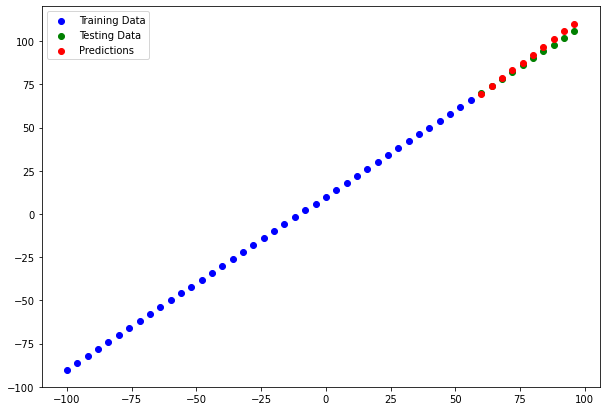

In [52]:
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions = y_preds_2)

# Saving a model

In [56]:
model_2.save("Best_model_SavedModel_format")

INFO:tensorflow:Assets written to: Best_model_SavedModel_format/assets


In [59]:
model_2.save("Best_Model.h5")

# Loading a Model

In [60]:
loaded_saved_model = tf.keras.models.load_model("Best_model_SavedModel_format")

In [61]:
loaded_saved_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 1)                 2         
                                                                 
 dense_9 (Dense)             (None, 1)                 2         
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [63]:
model_2_preds = model_2.predict(X_test)
saved_model_preds = loaded_saved_model.predict(X_test)
mae(y_test, saved_model_preds.squeeze()).numpy() == mae(y_test, model_2_preds.squeeze()).numpy()

True